In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
import folium
import seaborn as seabornInstance
%matplotlib inline

In [2]:
df_21 = pd.read_csv('world-happiness-report-2021.csv', sep = ';')
df_20 = pd.read_excel('WHR20.xls')
df = pd.read_excel('relatorio da felicidade.xls')

In [3]:
df.columns = [column.lower().replace(' ', '_').replace('/', '_') for column in df.columns]
df_20.columns = [column.lower().replace(' ', '_').replace('/', '_') for column in df_20.columns]
df_21.columns = [column.lower().replace(' ', '_').replace('/', '_') for column in df_21.columns]

In [4]:
df_20['year'] = 2020

In [5]:
df_21['year'] = 2021

In [6]:
df = df.drop(['positive_affect', 'negative_affect',
       'confidence_in_national_government', 'democratic_quality',
       'delivery_quality', 'standard_deviation_of_ladder_by_country-year',
       'standard_deviation_mean_of_ladder_by_country-year',
       'gini_index_(world_bank_estimate)',
       'gini_index_(world_bank_estimate),_average_2000-2017,_unbalanced_panel',
       'gini_of_household_income_reported_in_gallup,_by_wp5-year',
       'most_people_can_be_trusted,_gallup',
       'most_people_can_be_trusted,_wvs_round_1981-1984',
       'most_people_can_be_trusted,_wvs_round_1989-1993',
       'most_people_can_be_trusted,_wvs_round_1994-1998',
       'most_people_can_be_trusted,_wvs_round_1999-2004',
       'most_people_can_be_trusted,_wvs_round_2005-2009',
       'most_people_can_be_trusted,_wvs_round_2010-2014'], axis = 1)

In [7]:
df_20 = df_20.drop(['standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker','ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'], axis = 1)

In [8]:
df_20 =df_20.rename(columns={'ladder_score':'life_ladder', 'logged_gdp_per_capita':'log_gdp_per_capita',
                'healthy_life_expectancy':'healthy_life_expectancy_at_birth'})

In [9]:
df_21 = df_21.drop(['standard_error_of_ladder_score', 'upperwhisker', 'lowerwhisker','ladder_score_in_dystopia',
       'explained_by:_log_gdp_per_capita', 'explained_by:_social_support',
       'explained_by:_healthy_life_expectancy',
       'explained_by:_freedom_to_make_life_choices',
       'explained_by:_generosity', 'explained_by:_perceptions_of_corruption',
       'dystopia_+_residual'], axis = 1)

In [10]:
df_21 =df_21.rename(columns={'ladder_score':'life_ladder', 'logged_gdp_per_capita':'log_gdp_per_capita',
                'healthy_life_expectancy':'healthy_life_expectancy_at_birth'})

In [11]:
data = pd.concat([df,df_20, df_21])
data

,country_name,year,regional_indicator,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Afghanistan,2008,South Asia,3.723590,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686
1,Afghanistan,2009,South Asia,4.401778,7.314788,0.552308,51.200001,0.678896,0.201228,0.850035
2,Afghanistan,2010,South Asia,4.758381,7.421525,0.539075,51.599998,0.600127,0.131578,0.706766
3,Afghanistan,2011,South Asia,3.831719,7.394349,0.521104,51.919998,0.495901,0.173452,0.731109
4,Afghanistan,2012,South Asia,3.782938,7.480296,0.520637,52.240002,0.530935,0.246943,0.775620
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,Sub-Saharan Africa,3.512000,7.926000,0.787000,48.700000,0.715000,-0.131000,0.915000
145,Botswana,2021,Sub-Saharan Africa,3.467000,9.782000,0.784000,59.269000,0.824000,-0.246000,0.801000
146,Rwanda,2021,Sub-Saharan Africa,3.415000,7.676000,0.552000,61.400000,0.897000,0.061000,0.167000
147,Zimbabwe,2021,Sub-Saharan Africa,3.145000,7.943000,0.750000,56.201000,0.677000,-0.047000,0.821000


In [12]:
df = data.groupby(['country_name', 'regional_indicator'])[['life_ladder','log_gdp_per_capita','social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption']].mean().sort_values(by= 'life_ladder', ascending = False).reset_index()

In [330]:
data.to_csv('happiness.csv', index = False, sep = ';', decimal = '.')

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().any()

country_name                        False
regional_indicator                  False
life_ladder                         False
log_gdp_per_capita                  False
social_support                      False
healthy_life_expectancy_at_birth    False
freedom_to_make_life_choices        False
generosity                          False
perceptions_of_corruption           False
dtype: bool

In [15]:
df.perceptions_of_corruption.fillna((df.perceptions_of_corruption.mean()), inplace=True)
df

,country_name,regional_indicator,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Denmark,Western Europe,7.684721,10.742603,0.957547,71.227656,0.946030,0.163603,0.196232
1,Finland,Western Europe,7.608940,10.623374,0.948810,71.224345,0.939420,0.000596,0.246709
2,Switzerland,Western Europe,7.554977,10.969366,0.943148,73.376586,0.924703,0.115009,0.306787
3,Norway,Western Europe,7.519603,11.071803,0.950377,72.709162,0.954083,0.127489,0.336634
4,Netherlands,Western Europe,7.462436,10.774930,0.933763,71.740061,0.906148,0.272823,0.415369
...,...,...,...,...,...,...,...,...,...
180,Burundi,Sub-Saharan Africa,3.612989,6.575313,0.438369,51.625715,0.501060,-0.027688,0.696469
181,Rwanda,Sub-Saharan Africa,3.612927,7.421688,0.608992,58.109918,0.872409,0.019199,0.184429
182,Central African Republic,Sub-Saharan Africa,3.508445,6.740745,0.388709,43.663335,0.673838,0.044389,0.850409
183,Afghanistan,South Asia,3.444674,7.446015,0.502308,52.305929,0.499622,0.055387,0.855506


In [13]:
brazil =  data[data['country_name'] == 'Brazil'].reset_index(drop=True)

In [15]:
brazil.dropna(inplace=True)

In [16]:
brazil.isnull().any()

country_name                        False
year                                False
regional_indicator                  False
life_ladder                         False
log_gdp_per_capita                  False
social_support                      False
healthy_life_expectancy_at_birth    False
freedom_to_make_life_choices        False
generosity                          False
perceptions_of_corruption           False
dtype: bool

In [17]:
brazil

,country_name,year,regional_indicator,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption
1,Brazil,2007,South America,6.320673,9.498043,0.886402,63.779999,0.776645,-0.022853,0.728038
2,Brazil,2008,South America,6.691425,9.537787,0.878108,64.019997,0.781931,-0.084331,0.688273
3,Brazil,2009,South America,7.000832,9.526909,0.912818,64.260002,0.766716,-0.061908,0.722515
4,Brazil,2010,South America,6.837331,9.590113,0.905528,64.500000,0.805949,-0.060708,0.656036
5,Brazil,2011,South America,7.037817,9.619927,0.916253,64.760002,0.833656,-0.079116,0.662167
7,Brazil,2013,South America,7.140283,9.650891,0.910422,65.279999,0.784815,-0.101502,0.706954
8,Brazil,2014,South America,6.980999,9.647360,0.898316,65.540001,0.713814,-0.121986,0.710303
9,Brazil,2015,South America,6.546897,9.602870,0.906693,65.800003,0.798935,-0.022317,0.771339
10,Brazil,2016,South America,6.374817,9.561020,0.912455,66.000000,0.806572,-0.106995,0.781093
11,Brazil,2017,South America,6.332929,9.563531,0.904694,66.199997,0.764793,-0.181628,0.794457


In [18]:
brazil_describe =  brazil.describe().T[['mean', 'min', 'max']]

In [19]:
import dataframe_image as di
di.export(brazil_describe,'brazil_describe.tiff')


# Visualização dos dados

## Pontuação da felicidade ao longo dos anos

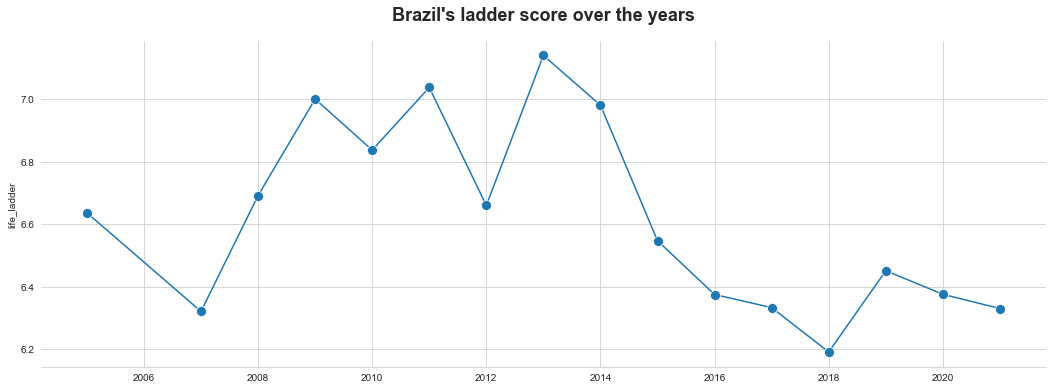

In [374]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='life_ladder', data=brazil, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title("Brazil's ladder score over the years", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

## PIB ao longo dos anos

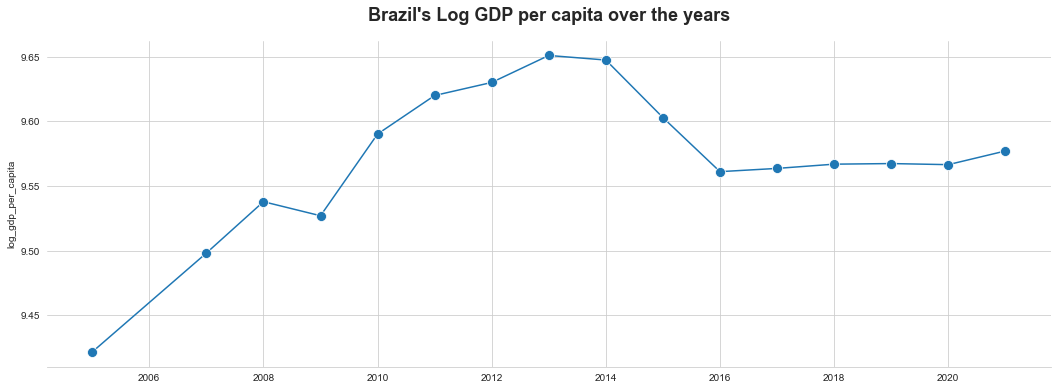

In [375]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='log_gdp_per_capita', data=brazil, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title("Brazil's Log GDP per capita over the years", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

## Apoio Social ao longo dos anos

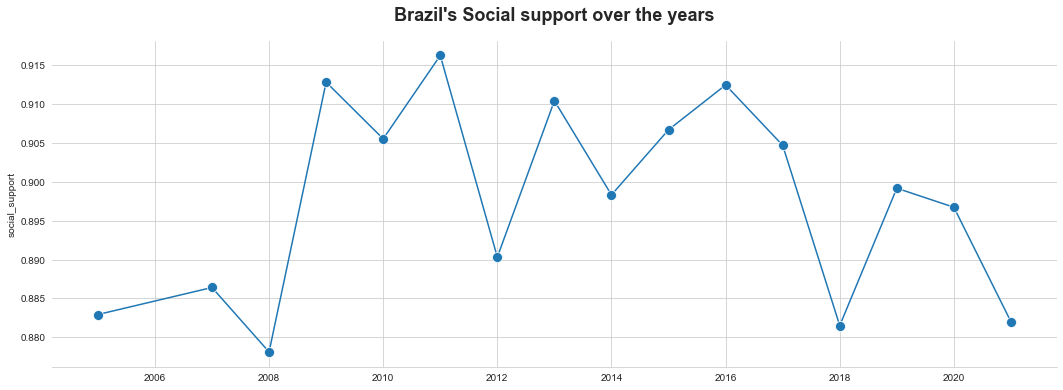

In [376]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='social_support', data=brazil, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title("Brazil's Social support over the years", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

## Expectativa de vida ao longo dos anos

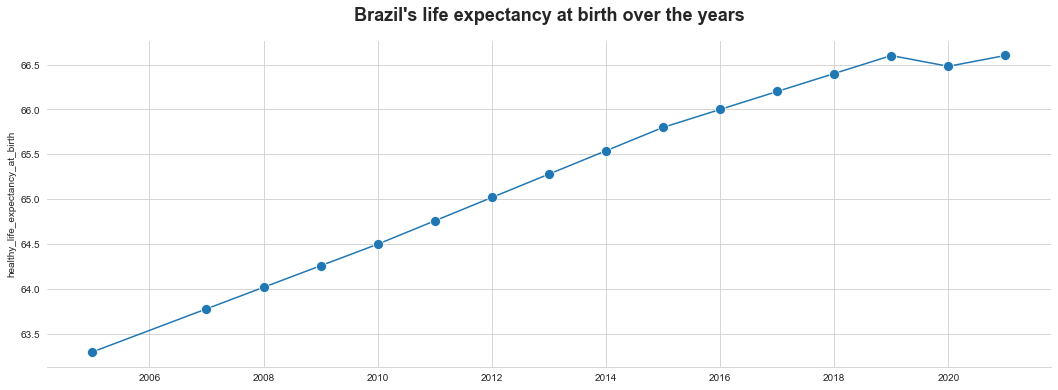

In [377]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='healthy_life_expectancy_at_birth', data=brazil, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title("Brazil's life expectancy at birth over the years", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

## Liberdade de escolha ao longo dos anos

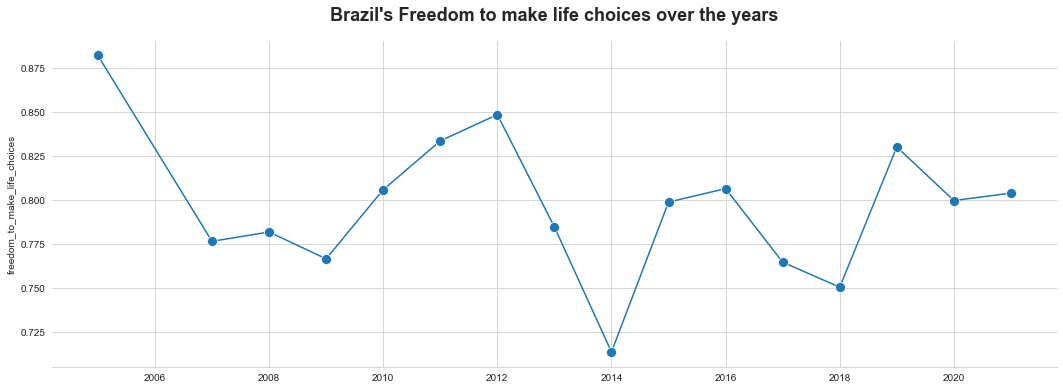

In [378]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='freedom_to_make_life_choices', data=brazil, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title("Brazil's Freedom to make life choices over the years", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

## Generosidade ao longo dos anos

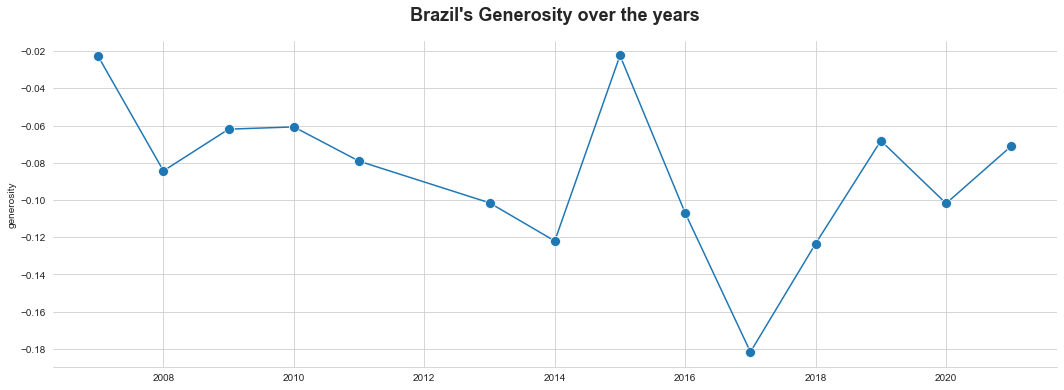

In [379]:
plt.figure(figsize=(18, 6)) 
sns.lineplot(x='year', y='generosity', data=brazil, marker='o', markersize=10); sns.set_style('whitegrid') 
sns.despine(left=True) 
plt.title("Brazil's Generosity over the years", fontsize=18, fontweight='bold', pad=20) 
plt.xlabel('') 
plt.show()

## Perspecção de corrupção ao longo dos anos

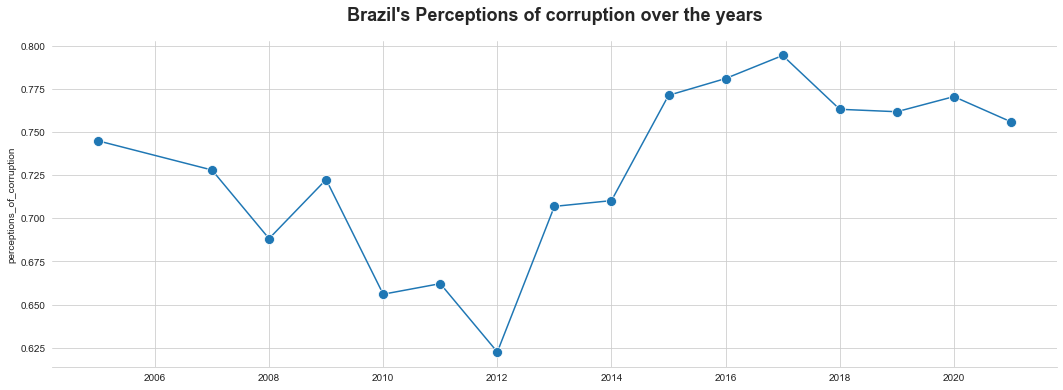

In [380]:
plt.figure(figsize=(18, 6))
sns.lineplot(x='year', y='perceptions_of_corruption', data=brazil, marker='o', markersize=10);
sns.set_style('whitegrid')
sns.despine(left=True)
plt.title("Brazil's Perceptions of corruption over the years", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

# Brazil e os seu vizinhos

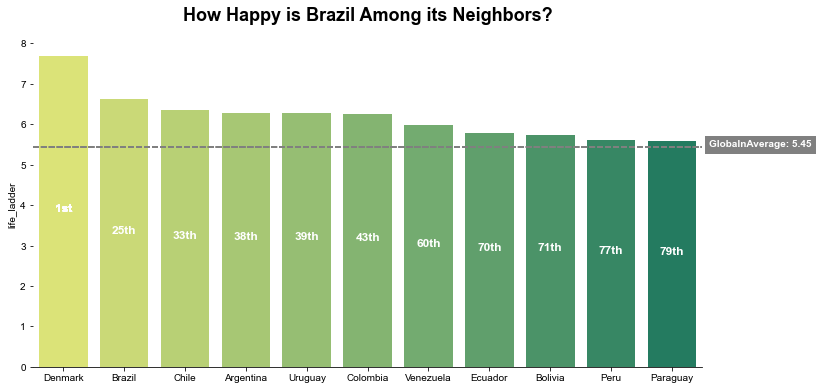

In [19]:
top = df[df['country_name'] == 'Finland']
sul_america = df[df['regional_indicator'] == 'South America']
top_bottom_neighbors = pd.concat([top, sul_america], axis=0)
top_bottom_neighbors['Rank'] = top_bottom_neighbors.index + 1
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop(['regional_indicator'], axis=1, inplace=True)
df_glob = df.sort_values('life_ladder', ascending=False)[['country_name', 'life_ladder', 'regional_indicator']].reset_index(drop=True)
top = df_glob[df_glob['life_ladder'] == df_glob['life_ladder'].max()]
neighbors = df_glob[df_glob['regional_indicator'] == 'South America']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('regional_indicator', axis=1, inplace=True)
mean_score = df['life_ladder'].mean()
rank = list(top_bottom_neighbors['Rank'])
fig, ax = plt.subplots(figsize=(12, 6))
bar = sns.barplot(x='country_name', y='life_ladder', data=top_bottom_neighbors, palette='summer_r')
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['life_ladder'][i])/2, s=str(rank[i])+'th',
                fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.text(x=0, y=(top_bottom_neighbors['life_ladder'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.axhline(mean_score, color='grey', linestyle='--')
    bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
            fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title("How Happy is Brazil Among its Neighbors?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

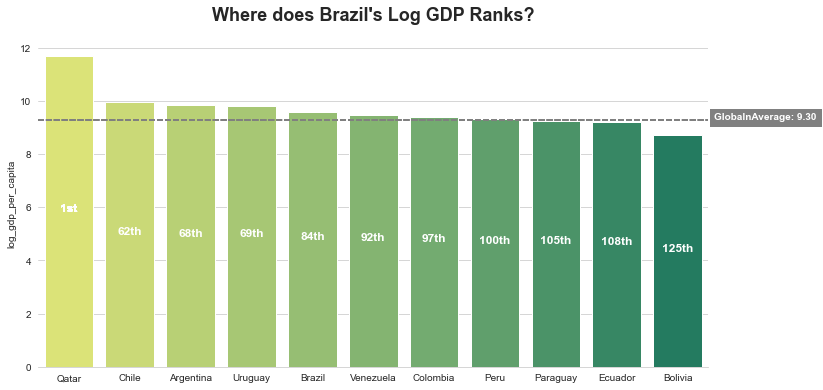

In [383]:
df_glob = df.sort_values('log_gdp_per_capita', ascending=False)[['country_name', 'log_gdp_per_capita', 'regional_indicator']].reset_index(drop=True)
top = df_glob[df_glob['log_gdp_per_capita'] == df_glob['log_gdp_per_capita'].max()]
neighbors = df_glob[df_glob['regional_indicator'] == 'South America']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('regional_indicator', axis=1, inplace=True)
mean_score = df['log_gdp_per_capita'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='country_name', y='log_gdp_per_capita', data=top_bottom_neighbors, palette='summer_r');
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['log_gdp_per_capita'][i])/2, s=str(rank[i])+'th',
                fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.text(x=0, y=(top_bottom_neighbors['log_gdp_per_capita'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.axhline(mean_score, color='grey', linestyle='--')
    bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
            fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title("Where does Brazil's Log GDP Ranks?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

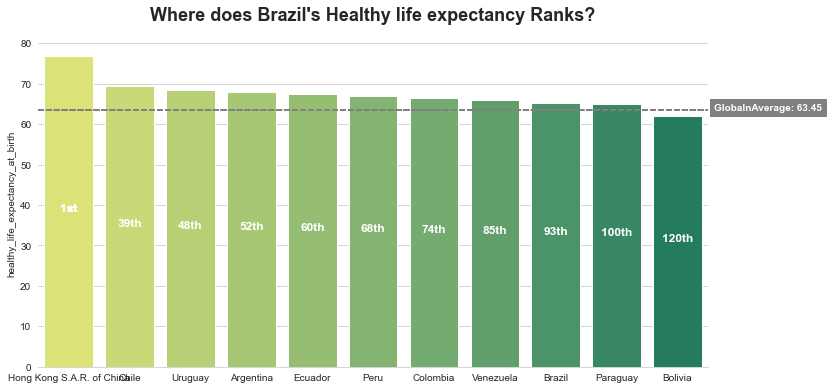

In [384]:
df_glob = df.sort_values('healthy_life_expectancy_at_birth', ascending=False)[['country_name', 'healthy_life_expectancy_at_birth', 'regional_indicator']].reset_index(drop=True)
top = df_glob[df_glob['healthy_life_expectancy_at_birth'] == df_glob['healthy_life_expectancy_at_birth'].max()]
neighbors = df_glob[df_glob['regional_indicator'] == 'South America']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('regional_indicator', axis=1, inplace=True)
mean_score = df['healthy_life_expectancy_at_birth'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='country_name', y='healthy_life_expectancy_at_birth', data=top_bottom_neighbors, palette='summer_r');
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['healthy_life_expectancy_at_birth'][i])/2, s=str(rank[i])+'th',
                fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.text(x=0, y=(top_bottom_neighbors['healthy_life_expectancy_at_birth'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.axhline(mean_score, color='grey', linestyle='--')
    bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
            fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title("Where does Brazil's Healthy life expectancy Ranks?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()

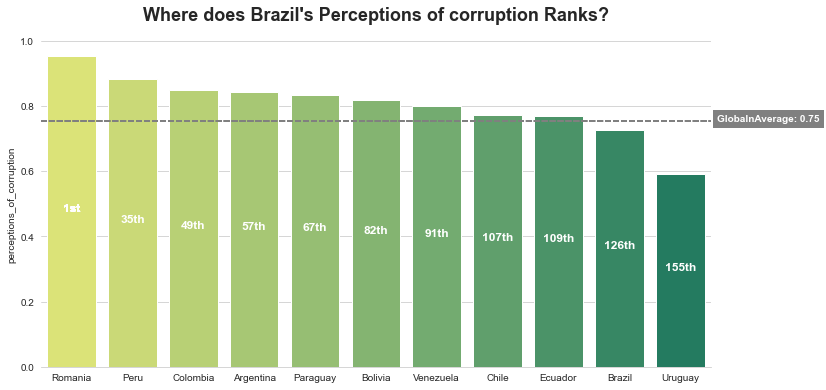

In [385]:
df_glob = df.sort_values('perceptions_of_corruption', ascending=False)[['country_name', 'perceptions_of_corruption', 'regional_indicator']].reset_index(drop=True)
top = df_glob[df_glob['perceptions_of_corruption'] == df_glob['perceptions_of_corruption'].max()]
neighbors = df_glob[df_glob['regional_indicator'] == 'South America']
top_bottom_neighbors = pd.concat([top, neighbors], axis=0)
top_bottom_neighbors['Rank'] = list(top_bottom_neighbors.index + 1)
top_bottom_neighbors.reset_index(drop=True, inplace=True)
top_bottom_neighbors.drop('regional_indicator', axis=1, inplace=True)
mean_score = df['perceptions_of_corruption'].mean()
rank = list(top_bottom_neighbors['Rank'])
plt.figure(figsize=(12, 6))
bar = sns.barplot(x='country_name', y='perceptions_of_corruption', data=top_bottom_neighbors, palette='summer_r');
sns.set_style('whitegrid')
sns.despine(left=True)
for i in range(1, len(top_bottom_neighbors)):
    bar.text(x=i, y=(top_bottom_neighbors['perceptions_of_corruption'][i])/2, s=str(rank[i])+'th',
                fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.text(x=0, y=(top_bottom_neighbors['perceptions_of_corruption'][0])/2, s=str(rank[0])+'st', fontdict=dict(color='white', fontsize=12, fontweight='bold', horizontalalignment='center'))
    bar.axhline(mean_score, color='grey', linestyle='--')
    bar.text(x=len(top_bottom_neighbors)-0.4, y = mean_score, s = 'GlobalnAverage: {:.2f}'.format(mean_score),
            fontdict = dict(color='white', backgroundcolor='grey', fontsize=10, fontweight='bold'))
plt.title("Where does Brazil's Perceptions of corruption Ranks?", fontsize=18, fontweight='bold', pad=20)
plt.xlabel('')
plt.show()